#### <div align='Center'><font size="7" color="#51ABDA">First NLP Analysis</font></div>

<div align='left'><font size="5" color="#51ABDA">Introduction</font></div>
This is my first NLP Analysis kernal.It was really hard journey to finish it. But I'm very proud of myself.
<hr>


<div align='left'><font size="5" color="#51ABDA">Goal</font></div>
prediction of `selected_text` into submission file by modeling

# Structure  <a class="anchor" id="toc"></a>

* <a href="#sec1">1. Preliminary step</a>
 * <a href="#sec1.1"> 1.1. Jaccard score </a>
 * <a href="#sec1.2"> 1.2. Importing prerequisite libraries</a>
 * <a href="#sec1.3"> 1.3. Reading datasets</a>
 

* <a href="#sec2">2. Exploratory Data Analysis(EDA)</a>
  * <a href="#sec2.1"> 2.1. Missing values </a>
  * <a href="#sec2.2"> 2.2. Incorrect datatype</a>
  * <a href="#sec2.3"> 2.3. Sampling of Sentiment</a>
  * <a href="#sec2.4"> 2.4. Data Visualization</a>
    * <a href="#sec2.4.1"> sentiment proportion</a>   
    * <a href="#sec2.4.2"> Add new feature</a> 
    * <a href="#sec2.4.3"> Text data analysis</a>   
    
    
* <a href="#sec3"> 3. Text data preprocessing</a>
  * <a href="#sec3.1"> 3.1. Stemming</a>
  * <a href="#sec3.2"> 3.2. Cotraction mapping</a>
  * <a href="#sec3.3"> 3.3. Spelling corrector</a>
  * <a href="#sec3.4"> 3.4. Cleanig corpus</a>
  * <a href="#sec3.5"> 3.5. Tokenization</a>
  * <a href="#sec3.6"> 3.6. Removing stopwords</a>

* <a href="#sec4"> 4. Word Analysis</a>
  * <a href="#sec4.1"> 4.1. Word Frequency</a>
  * <a href="#sec4.2"> 4.2. Word cloud</a> 

* <a href="#sec5"> 5. N-gram Analysis</a>
 * <a href="#sec5.1"> 5.1. bigrams </a> 
 * <a href="#sec5.2"> 5.2. trigrams </a> 


* <a href="#sec6">6. PLUS</a>
 * <a href="#sec6.1"> 6.1. Spelling corector</a>
 * <a href="#sec6.2"> 6.2. Removing Weird Space</a>
* <a href="#sec7">7. Closing</a>

<a id='sec1'></a>
# 1. Preliminary step
<a href="#toc">(Back to the structure)</a>

<a id='sec1.1'></a>
## 1.1 Jaccard score

I got a lof of helps about `Jaccard score` from [Parul's kernal](https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert). Be sure to check out !!

In [ ]:
# Numeric 
from math import*
 
def jaccard_numeric_values(x,y):
 
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
 
jaccard_numeric_values([0,1,2,5,6],[0,2,3,5,7,9])

In [ ]:
def jaccard_string(str1,str2):
    
    x = set(str1.lower().split())
    y = set(str2.lower().split())
    # convert String with lowercase and then split it
    
    z = x.intersection(y)
    t = x.union(y)
    # Alternative  : instead of t = x.union(y) you can write (len(x) + len(y) - len(z))
    return float(len(z)) / float(len(t))


Sentence_1 = 'I am a data scientist at Google'
Sentence_2 = 'I am a software engineer at Google'
Sentence_3 = 'I am a software engineer at Microsoft'

    
print(jaccard_string(Sentence_1,Sentence_2))
print(jaccard_string(Sentence_1,Sentence_3))
print(jaccard_string(Sentence_2,Sentence_3))

<a id='sec1.2'></a>
## 1.2 Importing prerequisite libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
import numpy as np
import pandas as pd


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

<a id='sec1.3'></a>
## 1.3 Reading datasets

In [ ]:
train = pd.read_csv('../input/tweet-sentiment-extraction/train.csv')
test = pd.read_csv('../input/tweet-sentiment-extraction/test.csv')
submission=pd.read_csv('../input/tweet-sentiment-extraction/sample_submission.csv')

In [ ]:
# First 5 rows of trains data
train.head()

In [ ]:
# shape of train data
rows = train.shape[0]
columns = train.shape[1]
print('The number of rows in train data are {0} and columns are {1}'.format(rows,columns))

In [ ]:
# First 5 rows of test data
test.head()

In [ ]:
# shape of train data
rows = test.shape[0]
columns = test.shape[1]
print('The number of rows in train data are {0} and columns are {1}'.format(rows,columns))

<a name="sec2"></a>
# 2. Exploratory Data Analysis (EDA)
<a href="#toc">(Back to the structure)</a>

<a name="sec2.1"></a>
### 2.1 Missing Value & Duplication

In [ ]:
train.isnull().sum()
# checking null value in train data
test.isnull().sum()
# checking null value in test data

Observation 

> We have one null value in train data. We need to drop out it

In [ ]:
train.dropna(axis = 0, how ='any',inplace=True) 

In [ ]:
print('The number of duplicated train data is:',sum(train.duplicated()))
print('The number of duplicated test data is:',sum(test.duplicated()))

> Observation 

No Duplication

<a name="sec2.2"></a>
### 2.2 Incorrect datatype

In [ ]:
train.info()

Observtion

> right datatype : Object(String)

<a name="sec2.3"></a>
### 2.3 Sampling of sentiment

In [ ]:
print('sample of positive sentiment: ',train[train['sentiment']=='positive']['selected_text'].sample())
print('sample of negative sentiment: ',train[train['sentiment']=='negative']['selected_text'].sample())
print('sample of neutral sentiment: ',train[train['sentiment']=='neutral']['selected_text'].sample())

<a name="sec2.4"></a>
### 2.4 Data Visualization 
<a href="#toc">(Back to the structure)</a>

<a name="sec2.4.1"></a>
### Sentiment proportion

In [ ]:
# Pie charts 
plt.figure(figsize=(17,7)) 
sorted_counts = train['sentiment'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('Train data sentiment proportion',fontsize=20);

Observation 

> **Neutral : 40% > Positive : 31% > Negative : 28%**. Accroding to the train data 40% of selected text are not allocted into either positve or negative.That means there are a lot of cases which are not clear to judge whether Sentiment is expressed or not

In [ ]:
# Pie charts 
plt.figure(figsize=(17,7)) 
sorted_counts = test['sentiment'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('Test data sentiment proportion',fontsize=20);

Observation 

> Same as train data

<a name="sec2.4.2"></a>
### Add new feature 
<a href="#toc">(Back to the structure)</a>

As we know our goal is that we predict selected_text in submission file. So it's more meaningful that we add new feature on the dataframe.


### First : Jaccard score

In [ ]:
def jaccard_string(str1,str2):
    
    x = set(str1.lower().split())
    y = set(str2.lower().split())
    
    z = x.intersection(y)
    t = x.union(y)
    return float(len(z)) / float(len(t))

# Just remember the beginning of this kernel. I introduced the jaccard score with python code. Copy it !!

In [ ]:
jaccard_score = []

for rows in train.itertuples():
    # another option : for index,rows in iterrows(), but in this case itertuples is faster than iterrows
    # Iterate over DataFrame rows as namedtuples.
    sentence1 = rows.text
    # first we saved text column as sentence 1 
    sentence2 = rows.selected_text
    # second we saved selected_text column as sentence 2

    
    jaccard_result = jaccard_string(sentence1,sentence2)
    # Now we apply jaccard score algoritum in sentnce 1,2

    jaccard_score.append([sentence1,sentence2,jaccard_result])
    # append sentence

In [ ]:
jaccard = pd.DataFrame(jaccard_score,columns=['text','selected_text','jaccard score'])
# save in dataframe

In [ ]:
jaccard.head()

In [ ]:
train=train.merge(jaccard,how='outer')
train.head()

# jaccard dataframe is merged with train data

### Second : number of word and difference

In [ ]:
train['number of word in T'] = train['text'].apply(lambda x : len(str(x).split() ))   # number of word in Text
train['number of word in ST'] = train['selected_text'].apply(lambda x : len(str(x).split() )) # number of word in Selected_text

train['difference'] = train['number of word in T'] - train['number of word in ST']

In [ ]:
train.head()

Observation 

finally we have jaccard and difference in number of word between `text` and `selected_text`

<a name="sec2.4.3"></a>
### Text data analysis

In [ ]:
positive = train[train['sentiment']=='positive']
negative = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

**First : Text**

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=train,edgecolor='black',color='red')
plt.title('Number of word in text',fontsize=20)
plt.xlabel('Number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=positive,edgecolor='black',color='red')
plt.title('Positive sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=negative,edgecolor='black',color='red')
plt.title('Negative sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=neutral,edgecolor='black',color='red')
plt.title('Neutral sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

Observation

> Distribution without sentiment filtering and with filtering are showing very similar tendecy.

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=train,edgecolor='black',color='green')
plt.title('Number of word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=positive,edgecolor='black',color='green')
plt.title('Positive sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=negative,edgecolor='black',color='green')
plt.title('Negative sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

In [ ]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=neutral,edgecolor='black',color='green')
plt.title('Neutral sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

Observation 

> Unlike text column, selected text has one exception. Without neutral sentiment graphs represent strong right skewed distribution.But neutral sentiment is showing different shape which is almost same tendency like text column

In [ ]:
plt.figure(figsize=(15,8))
p1=sns.kdeplot(train['number of word in ST'], shade=True, color="r")
p1.set_title('Distribution of Number Of words',fontsize=20)
p1=sns.kdeplot(train['number of word in T'], shade=True, color="b");

Observation

> Remarkably different distribution of `number of word from text` and `number of word from selectec text`

In [ ]:
plt.figure(figsize=(15,8))
p1=sns.kdeplot(train['difference'], shade=True, color="y")
p1.set_title('Distribution of Difference',fontsize=20)
x1 = list(range(0,35,3))
plt.xticks(x1);

Observation 

> about 20% of word difference is zero.That mean 20% of selected text are 100% same as text.

In [ ]:
plt.figure(figsize=(20,8))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard score'], shade=True, color="r").set_title('Distribution of Jaccrd score',fontsize=20)
p1=sns.kdeplot(train[train['sentiment']=='negative']['jaccard score'], shade=True, color="b")
plt.legend(['positive sentiment','negative sentiment'],title='Jaccard score');

In [ ]:
plt.figure(figsize=(15,15))
g=sns.jointplot("number of word in T", "number of word in ST", data=train,kind="kde", space=0, color="g");
g.fig.suptitle("number of word in Text and selected Text",fontsize=20)

# Format nicely.
g.fig.tight_layout()

#Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.9)
plt.show()

<a name="sec3"></a>
# 3. Text data preprocessing

<a href="#toc">(Back to the structure)</a>

<a name="sec3.1"></a>
## 3.1 Stemming

stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form

Like here

- sleeping -> sleep
- sleepy -> sleep

In [ ]:
from nltk.stem import SnowballStemmer

def stemming(words):
    s = SnowballStemmer('english')
    s.stem(words)
    return words 

In [ ]:
train['text'] = train['text'].apply(lambda x: stemming(x))
test['text'] = test['text'].apply(lambda x:stemming(x))
train['selected_text'] = train['selected_text'].apply(lambda x: stemming(x))

<a name="sec3.2"></a>
## 3.2 Contraction mapping

<a href="#toc">(Back to the structure)</a>

Contraction are shortened version of words or syllables. By nature, contraction pose a problem for NLP and text analysis because we have a special apostrophe character in the word. Hence, there should be some definitve process by which we can deal with contractions when processing text. 

In [ ]:
"""
Expanding contraction 
"""
dic = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" };

In [ ]:
def mapping_replacer(x, dic): 
    for word in dic.keys(): 
        if " " + word + " " in x: 
            x = x.replace(" " + word + " ", " " + dic[word] + " ")
    return x

In [ ]:
train['text'] = train['text'].apply(lambda x:mapping_replacer(x,dic))
train['selected_text'] = train['selected_text'].apply(lambda x:mapping_replacer(x,dic))
test['text'] = test['text'].apply(lambda x:mapping_replacer(x,dic))

In [ ]:
train

<a name="sec3.3"></a>
## 3.3 Spelling corrector

<a href="#toc">(Back to the structure)</a>

In [ ]:
misspell_data = pd.read_csv("/kaggle/input/spelling/aspell.txt",sep=":",names=["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))

In [ ]:
def misspelled_correction(val):
    for x in val.split(): 
        if x in miss_corr.keys(): 
            val = val.replace(x, miss_corr[x]) 
    return val

train["text"] = train["text"].apply(lambda x : misspelled_correction(x))
test["text"] = test["text"].apply(lambda x : misspelled_correction(x))
train["selected_text"] = train['selected_text'].apply(lambda x : misspelled_correction(x))

<a name="sec3.4"></a>
## 3.4 Cleaning Corpus 
<a href="#toc">(Back to the structure)</a>

Preprocessig is the process which cleans the data to get all in a consistent format and  accurate prediction score. So this process is directly connected with the model result. We need to clean,tokenize and convert data into the matric form 

* make a lowercase
* remove text in square brackets
* reomve hyperlin,HTML
* remove punctuation
* remove line change
* remove words containig numbers

For that we need special libraries 

<a name="sec3.5"></a>
## 3.5 Tokenization
<a href="#toc">(Back to the structure)</a>

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens. I'll show 4 famous Tokenization methods

<div align='left'><font size="3" color="#51ABDA">Wordtokenizer</font></div>
split the token by white space

<div align='left'><font size="3" color="#51ABDA">Treebanktokenizer</font></div>

- split standard contractions, e.g. don't -> do n't and they'll -> they 'll

- treat most punctuation characters as separate tokens

- split off commas and single quotes, when followed by whitespace

- separate periods that appear at the end of line

<div align='left'><font size="3" color="#51ABDA">WordPunctTokenizer</font></div>
split the token by punctuation

<div align='left'><font size="3" color="#51ABDA">RegexpTokenizer</font></div>
A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

<hr>
In this we'll use `RegexpTokenizer`

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
########################### Cleaning Corpus ####################################

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    # make a lowercase 

    # re.sub(pattern,repl,string) 
    # find corresponded pattern from string convert to repl
    
    
    text = re.sub('\[.*?\]', '', text)
    #remove text in square brackets
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove Hyperlink,HTML 
    
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove punctuation
    
    text = re.sub('\n', '', text)
    # remove line change

    text = re.sub('\w*\d\w*', '', text)
    # remove words containing numbers.

    return text


########################### Tokenization ####################################


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:

# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text'] = test['text'].apply(str).apply(lambda x: text_preprocessing(x))
train['selected_text'] = train['selected_text'].apply(str).apply(lambda x: text_preprocessing(x))


# Let's take a look at the updated text
train.head()

<a name="sec3.6"></a>
## 3.6 Removing Stopwords
<a href="#toc">(Back to the structure)</a>


- This part can be belonged to the `Part 4.1`.But personally I want to show it separately because for removing stopwords we need to use special libraires.

- Stopword is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

- The reason for ignoring is that those words are not cruial component of the **sentiment analysis**. In other words stopwords have no meaning ,which is related to sentiment or expression


**Notice** 

In order to remve stopswords we have to split word by word. If you compile function without spliting words. your text table will be splited by alphabet.So don't forget to do it !!! 

In [ ]:
# Step 1 split word by word

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def tokenizer(text):
    word_tokens = word_tokenize(text)
    return word_tokens

'''
Alternative of def tokenizer(text)

# from collections import Counter
# train['word'] = train['selected_text'].apply(lambda x:str(x).split())
'''

train['word from ST'] = train['selected_text'].apply(str).apply(lambda x: tokenizer(x))
train['word from T'] = train['text'].apply(str).apply(lambda x: tokenizer(x))



In [ ]:
# Step 2 remove stopwords 

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['word from ST'] = train['word from ST'].apply(lambda x:remove_stopword(x))
train['word from T'] = train['word from T'].apply(lambda x: remove_stopword(x))

In [ ]:
train.head()

Observation

> Now we are ready for Word data Analysis 

<a name="sec4"></a>
# 4. Word data Analysis
<a href="#toc">(Back to the structure)</a>

<a name="sec4.1"></a>
## 4.1 Word Frequencey 
<a href="#toc">(Back to the structure)</a>

In [ ]:
from collections import Counter

In [ ]:
counting = Counter([item for sublist in train['word from T'] for item in sublist])
counting_table = pd.DataFrame(counting.most_common(30))
counting_table.drop([0],inplace=True)
counting_table.columns = ['word','counting']

plt.figure(figsize=(17,10))
ax= sns.barplot(data=counting_table,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 words from text '.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 words',fontsize=15);

Observation 
> `day` >> `good` >> `get` ...

In [ ]:
counting = Counter([item for sublist in train['word from ST'] for item in sublist])
counting_table = pd.DataFrame(counting.most_common(30))
counting_table.drop([0],inplace=True)
counting_table.columns = ['word','counting']

plt.figure(figsize=(17,10))
ax= sns.barplot(data=counting_table,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 words',fontsize=15);

Observation 
>`good` >> `day` >> `love` ...

In [ ]:
positive = train[train['sentiment']=='positive']
negative = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

In [ ]:
counting_positive_ST = Counter([item for sublist in positive['word from ST'] for item in sublist])
counting_positive_ST = pd.DataFrame(counting_positive_ST.most_common(30))
counting_positive_ST.drop([0],inplace=True)
counting_positive_ST.columns = ['word','counting']

plt.figure(figsize=(19,10))
ax= sns.barplot(data=counting_positive_ST,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 positive words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 positive words',fontsize=15);

Observation
> `happy` >> `love` >> `day`...

In [ ]:
counting_negative_ST = Counter([item for sublist in negative['word from ST'] for item in sublist])
counting_negative_ST = pd.DataFrame(counting_negative_ST.most_common(30))
counting_negative_ST.drop([0],inplace=True)
counting_negative_ST.columns = ['word','counting']

plt.figure(figsize=(19,10))
ax= sns.barplot(data=counting_negative_ST,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 negative words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 negative words',fontsize=15);

Observation
> `miss` >> `sad` >> `sorry` ...

In [ ]:
counting_neutral_ST = Counter([item for sublist in neutral['word from ST'] for item in sublist])
counting_neutral_ST = pd.DataFrame(counting_neutral_ST.most_common(30))
counting_neutral_ST.drop([0],inplace=True)
counting_neutral_ST.columns = ['word','counting']

plt.figure(figsize=(19,10))
ax= sns.barplot(data=counting_neutral_ST,x='word',y='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 neutral words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 neutral words',fontsize=15);

Observation
> `get` >> `go` >> `got`...

<a name="sec4.2"></a>
## 4.2 Word Cloud
<a href="#toc">(Back to the structure)</a>

In [ ]:
positive_text = train[train['sentiment']=='positive']['text']
negative_text = train[train['sentiment']=='negative']['text']
neutral_text = train[train['sentiment']=='neutral']['text']

In [ ]:
from wordcloud import WordCloud
from PIL import Image

In [ ]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(positive_text))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=20);

wordcloud2 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(negative_text))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=20);

wordcloud3 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(neutral_text))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=20);

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(15.0,8.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks/masks-wordclouds/'

In [ ]:
positive_selected_text = train[train['sentiment']=='positive']['selected_text']
negative_selected_text = train[train['sentiment']=='negative']['selected_text']
neutral_selected_text = train[train['sentiment']=='neutral']['selected_text']

In [ ]:
pos_mask = np.array(Image.open(d+ 'comment.png'))
plot_wordcloud(positive_selected_text,mask=pos_mask,color='white',max_font_size=70,title_size=20,title=" Positive selected text")

In [ ]:
pos_mask = np.array(Image.open(d+ 'loc.png'))
plot_wordcloud(negative_selected_text,mask=pos_mask,color='white',max_font_size=70,title_size=20,title="Negative selected text")

In [ ]:
pos_mask = np.array(Image.open(d+ 'star.png'))
plot_wordcloud(neutral_selected_text,mask=pos_mask,color='white',max_font_size=70,title_size=20,title="Neutral selected text")

<a name="sec5"></a>
# 5. N-gram analysis
<a href="#toc">(Back to the structure)</a>

I think, a thousand  hearing are not worth one seeing. Chech out what is **Unigram(1-grams)**,**Bigram(2-gram)** and **Trigrams(3-gram)**
[Source](https://deepai.org/machine-learning-glossary-and-terms/n-gram)
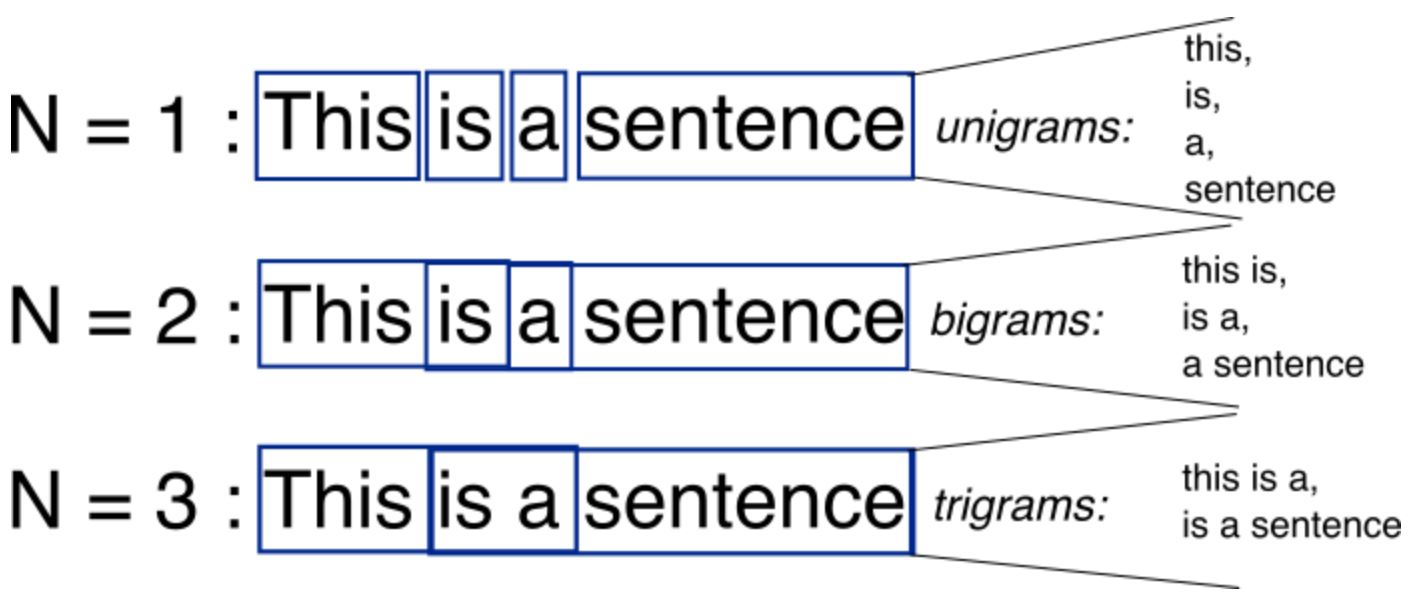
N-grams are simply all combinations of words or letters of length n that you can find in your source text.

I won't do Unigram because it's actually same as the tokenization of text and visualize it (Chapter 4 : Word data analysis)

For N-gram analysis we need countvectorizer from sci-kit learn [How to list the most common words from text corpus using countvectorizer ](https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d)

**Notice** 
In the part 4 We used Counter library to get a common word, but  this function is incapable to get a bigram or trigram. In other word that can get only unigram. That why we use another function 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# How to list the most common words from text corpus using countvectorizer 
def WordRanking(corpus,n_gram,n=None):
   
    vec = CountVectorizer(ngram_range=n_gram,stop_words = 'english').fit(corpus)
    # Here we get a Bag of Word model 
    
    bag_of_words = vec.transform(corpus)
    # bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary,
    # that is, all words found in corpus. Note that bag_of_words[i,j] is the occurrence of word j in the text i.
    
    sum_words = bag_of_words.sum(axis=0) 
    # we are adding the elements for each column of bag_of_words matrix.
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #Finally we sort a list of tuples that contain the word and their occurrence in the corpus.
    
    return words_freq[:n]

In [ ]:
postive_bigrams = WordRanking(positive_selected_text,(2,2),30)
negative_bigrams = WordRanking(negative_selected_text,(2,2),30)
neutral_bigrams = WordRanking(neutral_selected_text,(2,2),30)

postive_bigrams = pd.DataFrame(postive_bigrams,columns=['word','counting'])
negative_bigrams = pd.DataFrame(negative_bigrams,columns=['word','counting'])
neutral_bigrams = pd.DataFrame(neutral_bigrams,columns=['word','counting'])


<a name="sec5.1"></a>
## 5.1 Bigrams analysis
<a href="#toc">(Back to the structure)</a>


In [ ]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=postive_bigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 positive bigram words from selected text'.title(),fontsize=20)

ax.set_ylabel('Word counting',fontsize=15)
ax.set_xlabel('Top 30 positive bigram words',fontsize=15);

Observation 

> `mothers day` >> `happy mothers` >> `good morning` ...

In [ ]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=negative_bigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 negative bigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 negative bigram words',fontsize=15);

Observation

> `im sorry` >> `dont like` >> `feel like` ...

In [ ]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=neutral_bigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 neutral bigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 neutral bigram words',fontsize=15);

<a name="sec5.2"></a>
## 5.2 Trigrams analysis
<a href="#toc">(Back to the structure)</a>


In [ ]:
positive_trigrams = WordRanking(positive_selected_text,(3,3),30)
negative_trigrams = WordRanking(negative_selected_text,(3,3),30)
neutral_trigrams = WordRanking(neutral_selected_text,(3,3),30)

positive_trigrams = pd.DataFrame(positive_trigrams,columns=['word','counting'])
negative_trigrams = pd.DataFrame(negative_trigrams,columns=['word','counting'])
neutral_trigrams = pd.DataFrame(neutral_trigrams,columns=['word','counting'])

In [ ]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=positive_trigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 positive trigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 positive trigram words',fontsize=15);

Observation

> `happy mothers day` >> `happy star wars` >> `star wars day` ...

In [ ]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=negative_trigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 negative trigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 negative trigram words',fontsize=15);

Observation 

> `dont feel good` >> `dont think im` >> `hate hate hate` ...

In [ ]:
plt.figure(figsize=(19,10))
ax= sns.barplot(data=neutral_trigrams,y='word',x='counting',facecolor=(1, 1, 1, 0),edgecolor='black')
ax.set_title('Top 30 neutral trigram words from selected text'.title(),fontsize=20)

ax.set_xlabel('Word counting',fontsize=15)
ax.set_ylabel('Top 30 neutral trigram words',fontsize=15);

Observation 

> `just got home` >> `happy mothers day` >>  `star wars day`...

<a name="sec6"></a>
# 6 Options 
<a href="#toc">Back to the structure</a>

<a name="sec6.1"></a>
## 6.1 Spelling corrector

There is another concept of spellig corrector.[How to Write a Spelling Corrector from Peter Norvig](http://norvig.com/spell-correct.html).If you want to use this corrector, make sure that you have 'big.txt' file on your kernel. The reason why I didn't use this corrector is that my laptop can't reach the ability to compile the code.

In [ ]:
'''
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
    
    
'''

<a name="sec6.2"></a>
## 6.2 Removig weird spaces
<a href="#toc">(Back to the structure)</a>

In [ ]:
def remove_space(text): 
    text = text.strip() 
    text = text.split()
    return " ".join(text)

**Notice**

As I mentioned before this code is not working because `big.txt` isn't in the repository.

<a id='sec7'></a>
# 7. Closing 

<a href="#toc">(Back to the structure)</a>

Thanks for your reading my kernal.Because I'm kaggle newcomer i need much more time to practice in order to improve my kernal.
In the next time I'll make a second part of `Tweet sentiment` which is modeling and prediction of NLP.

### thank you all very much :) 

